# Detecting Depression from Tweets

In [1]:
import nltk                         # NLP toolbox
from os import getcwd
import pandas as pd                 # Library for Dataframes 
from nltk.corpus import twitter_samples 
import matplotlib.pyplot as plt     # Library for visualization
import numpy as np                  # Library for math functions


import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator
#!pip install wordcloud
from wordcloud import WordCloud
# Preprocessing
import nltk # Python library for NLP
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer, SnowballStemmer    # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer 
#nltk.download('stopwords')
#nltk.download('wordnet')
#classification
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection
from sklearn import feature_extraction
from collections import Counter
from nltk.util import ngrams
#nltk.download('punkt')

## 1. Collect m tweets and label them

Tweets collected from : https://www.kaggle.com/kazanova/sentiment140

Tweets were labeled according to the following keywords. 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6620890/#box1

(overwhelmed)

 (exhausted)

 (distressed)

(anxiety)

(anxious)

 (tired)

(low)

 (depression)

 (depressed as a condition)

 (depressed as state)

 (discouraged)

(desperate)

 (demotivated)

 (insomnia)

 (cry)

 (nervous)

 (worried)

(lonely)

(sad)

(empty)

## Modeling

In [2]:
tweets = pd.read_csv('train_tweets.csv') 
tweets.drop(['label','id','date', 'query','user'] , axis = 1,inplace = True)

In [3]:
tweets = tweets.rename(columns ={'description':'Text'})
#tweets.to_csv('tweets_data.csv')

In [5]:
tweets

,Text,flag
0,@HumpNinja I cry my asian eyes to sleep at night,1
1,"Sad, sad, sad. I don't know why but I hate thi...",1
2,I have a sad feeling that Dallas is not going ...,1
3,too worried and tired to post tonight,1
4,sad that the 'feet' of my macbook just fell off,1
...,...,...
24357,I was very surprised after stepping on the sca...,0
24358,@AwesomeRobot hackorz! thats teh illegalz! oh ...,0
24359,http://twitpic.com/7jomc - Party invites,0
24360,http://twitpic.com/7joyo - this is how i feel ...,0


In [6]:
dep_tweets = tweets[tweets['flag'] == 1]
nodep_tweets = tweets[tweets['flag'] == 0]

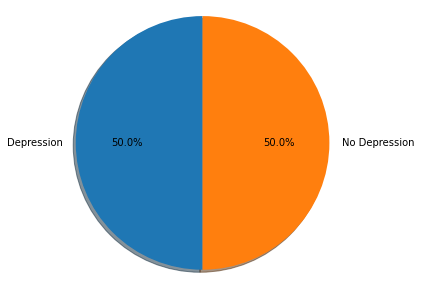

In [7]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Depression', 'No Depression'

# Sizes for each slide
sizes = [len(dep_tweets), len(nodep_tweets )] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

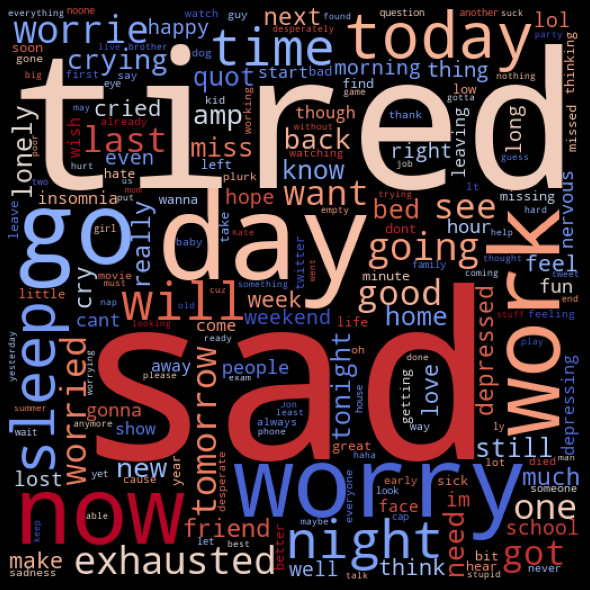

In [8]:
depression_words = ' '.join(list(tweets[tweets['flag'] == 1]['Text']))
dep_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="coolwarm").generate(depression_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(dep_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

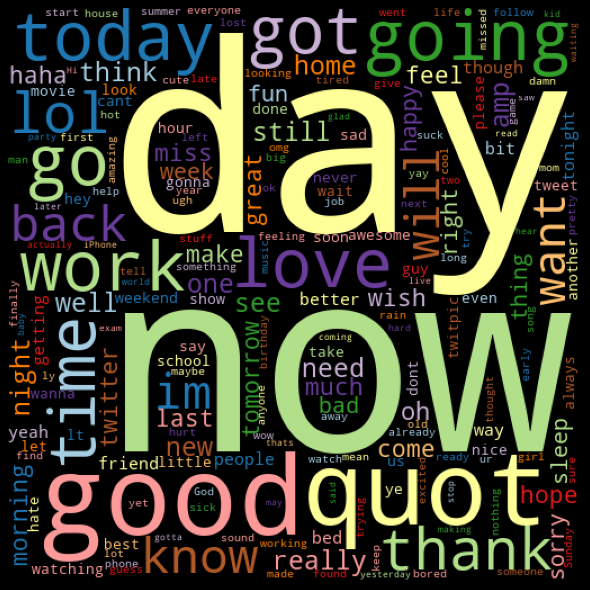

In [9]:
no_dep_words = ' '.join(list(tweets[tweets['flag'] == 0]['Text']))
no_dep_wc= WordCloud(width = 512,height = 512, collocations=False, colormap="Paired").generate(no_dep_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(no_dep_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## Process and Classify

In [10]:
class TweetClassify():

    def __init__(self, tweets_df, column_name , stemm = False, lemm =True):
        self.tweets_ = tweets_df
        self.stemm_ = stemm
        self.lemm_ = lemm
        self.stemmer_ = SnowballStemmer('english')
        self.lemmatizer_ = lemmatizer = WordNetLemmatizer()
        self.vect_wc = feature_extraction.text.CountVectorizer(max_features = 10000, ngram_range=(1,2))
        self.vect_tfidf = feature_extraction.text.TfidfVectorizer(max_features = 10000, ngram_range=(1,2))
        self.stopwords_eng_ = nltk.corpus.stopwords.words('english')
        self.preprocess(column_name)
    def preprocess(self, column_name):
        self.tweets_['tweets_clean'] = self.tweets_[column_name].apply(lambda x: self.clean_text(x, stemm= self.stemm_, lemm = self.lemm_ ,stop_words = self.stopwords_eng_))


    def clean_text(self,observation,stemm , lemm , stop_words):
        #Clean tweets (removing punctuations and converting everything to lowercase)
        
        observation = re.sub(r'[^\$\w\s]', '', str(observation).lower().strip())
        observation = re.sub(r'^RT[\s]+', '', observation)
        observation = re.sub(r'https?:\/\/.*[\r\n]*', '', observation) # removing hyperlinks
        observation = re.sub(r'#', '', observation) #removing hash # sign


        #Tokenize (converting strings to lists)
        tokens_list = observation.split()
        tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
        tokens_list = tokenizer.tokenize(observation)
        #Remove the Stopwords
        if stop_words is not None:
            stop_text = []
            for word in tokens_list: 
                if (word not in stop_words and  # remove stopwords
        word not in string.punctuation ): # remove punctuation
                    word_ = ''
                    for char in word:
                        if (char not in string.punctuation and
                            char not in ['1','2','3','4','5','6','7','8','9','0','',' ']):
                            word_ = "".join((word_,char))
                    stop_text.append(word_)
                    tokens_list = stop_text.copy()
        if stemm == True:
            stem_text = []
            for word in tokens_list: # Go through every word in the tokens list
                # Init the Stemmer
                stem_word = self.stemmer_.stem(word)
                stem_text.append(stem_word)
            tokens_list = stem_text.copy()
        if lemm == True:
            lem_text = []
            for word in tokens_list: # Go through every word in the tokens list
                # Init the Wordnet Lemmatizer
                lem_word = self.lemmatizer_.lemmatize(word)
                lem_text.append(lem_word)
            tokens_list = lem_text.copy()
        
        tweets_clean = " ".join(tokens_list)
        return tweets_clean

    def classify_text(self, y_column ,classifier, model_name, strategy, ngrams = (1,2)):
        scores = []
        kf = KFold(n_splits = 10, random_state = 42, shuffle = True)
        accuracy_scores = []
        auc_scores = []
        cm = np.array([[0,0],[0,0]])
        X = self.tweets_['tweets_clean']
        y = self.tweets_[y_column]

        if strategy == 'wc':
            vectorizer = feature_extraction.text.CountVectorizer(max_features = 10000, ngram_range=ngrams)
        elif strategy == 'tfidf':
            vectorizer = feature_extraction.text.TfidfVectorizer(max_features = 10000, ngram_range=ngrams)

        
        for tr_i , te_i in kf.split(X):
            model_pipe = pipeline.Pipeline([('vectorize',vectorizer),
                                    ('model', classifier)])
            X_tr = X.iloc[tr_i]
            y_tr = y[tr_i].values

            X_te = X.iloc[te_i]
            y_te = y[te_i].values
            
            # Fit data
            model_pipe.fit(X_tr, y_tr)
            # Predict
            y_hat = model_pipe.predict(X_te)
            proba = model_pipe.predict_proba(X_te)[:,1]
            # Evaluate
            accuracy_scores.append(metrics.accuracy_score(y_te, y_hat))
            auc_scores.append(metrics.roc_auc_score(y_te,proba ))
            # Confusion Matrix 
            cm  += metrics.confusion_matrix(y_te, y_hat)
        print(f'Classifier: {model_name}')
        print(f'Strategy: {str(strategy)}')
        print(f'N-grams: {str(ngrams)}')
        print(f'Tweets Classified: {str(len(X))}')
        print(f'Accuracy:{round(np.average(accuracy_scores),2)}')
        print(f'AUC: {round(np.average(auc_scores),2)}')

        classes = np.unique(y_te)
        fig,ax = plt.subplots()
        sns.heatmap(cm, annot = True, fmt = 'd', ax = ax,cmap = plt.cm.Blues)
        ax.set(xlabel = 'Predicted', ylabel = 'Actual',  xticklabels = classes, yticklabels = classes, title = 'Confusion Matrix')
        plt.yticks(rotation = 0)
        plt.title(f'{model_name} Confusion Matrix ')

        plt.show()

        return proba , model_pipe
    def get_data(self):
        X = self.tweets_['tweets_clean']
        y = self.tweets_['flag'].values
        return X,y

In [11]:
from nltk.tokenize import TweetTokenizer
tweets_processed = TweetClassify(tweets, column_name='Text')

In [12]:
tweets_processed.tweets_['tweets_clean']

0                      humpninja cry asian eye sleep night
1        sad sad sad dont know hate feeling wanna sleep...
2        sad feeling dallas going show gotta say though...
3                               worried tired post tonight
4                                    sad foot macbook fell
                               ...                        
24357         surprised stepping scale morning trying keep
24358    awesomerobot hackorz thats teh illegalz oh no ...
24359                     httptwitpiccom jomc party invite
24360    httptwitpiccom joyo feel today little imagery ...
24361            back getting new jonas brother cd ipod go
Name: tweets_clean, Length: 24362, dtype: object

### Classifiers Evaluation

In [15]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn import pipeline
from sklearn.model_selection import KFold
from sklearn import metrics, utils
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
# Evaluate
from sklearn import metrics
import seaborn as sns

rs = 123

In [18]:
nb_clf = naive_bayes.MultinomialNB()
lr_clf =  LogisticRegression(random_state = rs)
knn_clf = KNeighborsClassifier(3)
rf_clf = RandomForestClassifier(random_state=rs, n_jobs = -1)
gb_clf = GradientBoostingClassifier(random_state=rs)
svc_clf =  SVC(kernel="linear", C=0.025)
ada_clf = AdaBoostClassifier()

### Results with Bag of Words ngrams = (1,2)

Classifier: Naive_Bayes
Strategy: wc
N-grams: (1, 2)
Tweets Classified: 24362
Accuracy:0.9
AUC: 0.96


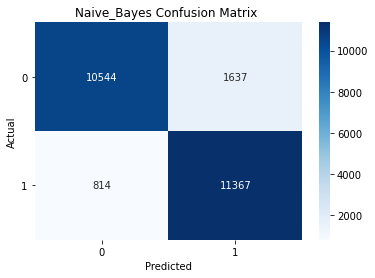

(array([0.99473157, 0.97490075, 0.9462045 , ..., 0.04827183, 0.00818617,
        0.01376765]),
 Pipeline(steps=[('vectorize',
                  CountVectorizer(max_features=10000, ngram_range=(1, 2))),
                 ('model', MultinomialNB())]))

In [63]:
tweets_processed.classify_text(y_column = 'flag',classifier = nb_clf, model_name='Naive_Bayes', strategy='wc', ngrams = (1,2))

Classifier: Random_Forest
Strategy: wc
N-grams: (1, 2)
Tweets Classified: 24362
Accuracy:0.96
AUC: 0.98


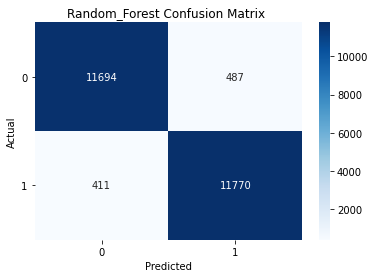

(array([0.96      , 0.88      , 0.95996622, ..., 0.13507933, 0.03      ,
        0.1       ]),
 Pipeline(steps=[('vectorize',
                  CountVectorizer(max_features=10000, ngram_range=(1, 2))),
                 ('model', RandomForestClassifier(n_jobs=-1, random_state=123))]))

In [65]:
tweets_processed.classify_text(y_column = 'flag',classifier = rf_clf, model_name='Random_Forest', strategy='wc', ngrams = (1,2))

Classifier: Gradient Boosting
Strategy: wc
N-grams: (1, 2)
Tweets Classified: 24362
Accuracy:0.96
AUC: 0.97


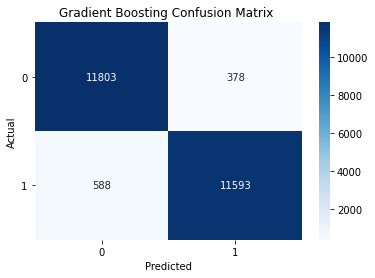

(array([0.98721767, 0.8054368 , 0.93630517, ..., 0.12584835, 0.12584835,
        0.12584835]),
 Pipeline(steps=[('vectorize',
                  CountVectorizer(max_features=10000, ngram_range=(1, 2))),
                 ('model', GradientBoostingClassifier(random_state=123))]))

In [66]:
tweets_processed.classify_text(y_column = 'flag',classifier = gb_clf, model_name='Gradient Boosting', strategy='wc', ngrams = (1,2))

Classifier: KNN
Strategy: wc
N-grams: (1, 2)
Tweets Classified: 24362
Accuracy:0.78
AUC: 0.85


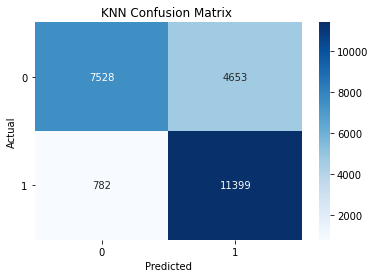

(array([1.        , 0.66666667, 1.        , ..., 0.33333333, 0.        ,
        0.66666667]),
 Pipeline(steps=[('vectorize',
                  CountVectorizer(max_features=10000, ngram_range=(1, 2))),
                 ('model', KNeighborsClassifier(n_neighbors=3))]))

In [69]:
tweets_processed.classify_text(y_column = 'flag',classifier = knn_clf, model_name='KNN', strategy='wc', ngrams = (1,2))

Classifier: Logistic_Regression
Strategy: wc
N-grams: (1, 2)
Tweets Classified: 24362
Accuracy:0.97
AUC: 0.98


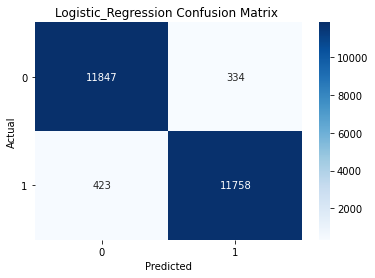

(array([0.99977429, 0.98330955, 0.99408543, ..., 0.07208577, 0.01851678,
        0.00203698]),
 Pipeline(steps=[('vectorize',
                  CountVectorizer(max_features=10000, ngram_range=(1, 2))),
                 ('model', LogisticRegression(random_state=123))]))

In [70]:
tweets_processed.classify_text(y_column = 'flag',classifier = lr_clf, model_name='Logistic_Regression', strategy='wc', ngrams = (1,2))

### Results with TFIDF ngrams = (1,2)

Classifier: Naive_Bayes
Strategy: tfidf
N-grams: (1, 2)
Tweets Classified: 24362
Accuracy:0.87
AUC: 0.94


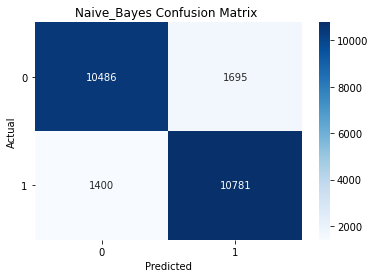

(array([0.85174256, 0.71937712, 0.58730588, ..., 0.26067136, 0.17811539,
        0.20262538]),
 Pipeline(steps=[('vectorize',
                  TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                 ('model', MultinomialNB())]))

In [71]:
tweets_processed.classify_text(y_column = 'flag',classifier = nb_clf, model_name='Naive_Bayes', strategy='tfidf', ngrams = (1,2))

Classifier: Random_Forest
Strategy: tfidf
N-grams: (1, 2)
Tweets Classified: 24362
Accuracy:0.97
AUC: 0.98


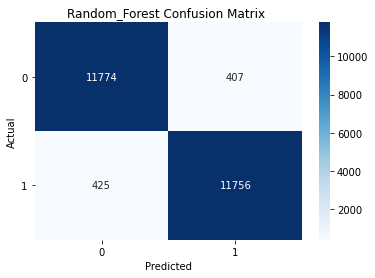

In [15]:
tweets_processed.classify_text(y_column = 'flag',classifier = rf_clf, model_name='Random_Forest',strategy='tfidf', ngrams = (1,2))

Classifier: Gradient Boosting
Strategy: tfidf
N-grams: (1, 2)
Tweets Classified: 24362
Accuracy:0.96
AUC: 0.97


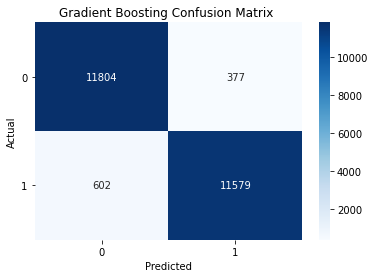

(array([0.98442011, 0.80742699, 0.93706765, ..., 0.12600508, 0.12600508,
        0.12600508]),
 Pipeline(steps=[('vectorize',
                  TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                 ('model', GradientBoostingClassifier(random_state=123))]))

In [73]:
tweets_processed.classify_text(y_column = 'flag',classifier = gb_clf, model_name='Gradient Boosting',strategy='tfidf', ngrams = (1,2))

Classifier: KNN
Strategy: tfidf
N-grams: (1, 2)
Tweets Classified: 24362
Accuracy:0.57
AUC: 0.61


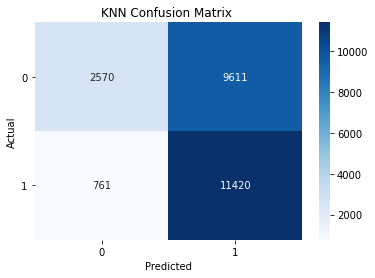

(array([1.        , 1.        , 1.        , ..., 0.66666667, 0.66666667,
        1.        ]),
 Pipeline(steps=[('vectorize',
                  TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                 ('model', KNeighborsClassifier(n_neighbors=3))]))

In [74]:
tweets_processed.classify_text(y_column = 'flag',classifier = knn_clf, model_name='KNN', strategy='tfidf', ngrams = (1,2))

Classifier: Logistic_Regression
Strategy: tfidf
N-grams: (1, 2)
Tweets Classified: 24362
Accuracy:0.96
AUC: 0.98


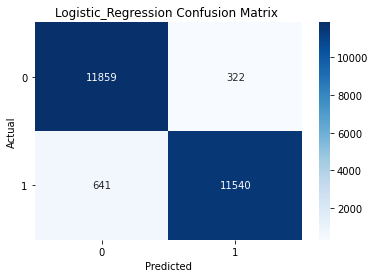

(array([0.99981736, 0.77573565, 0.96917784, ..., 0.12228531, 0.07123985,
        0.03663169]),
 Pipeline(steps=[('vectorize',
                  TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                 ('model', LogisticRegression(random_state=123))]))

In [75]:
tweets_processed.classify_text(y_column = 'flag',classifier = lr_clf, model_name='Logistic_Regression', strategy='tfidf', ngrams = (1,2))

## Save the Model as a pickle

In [12]:
tweets

,Text,flag
0,@HumpNinja I cry my asian eyes to sleep at night,1
1,"Sad, sad, sad. I don't know why but I hate thi...",1
2,I have a sad feeling that Dallas is not going ...,1
3,too worried and tired to post tonight,1
4,sad that the 'feet' of my macbook just fell off,1
...,...,...
24357,I was very surprised after stepping on the sca...,0
24358,@AwesomeRobot hackorz! thats teh illegalz! oh ...,0
24359,http://twitpic.com/7jomc - Party invites,0
24360,http://twitpic.com/7joyo - this is how i feel ...,0


In [40]:
def classify_text(X,y,classifier):
        vectorizer = feature_extraction.text.CountVectorizer(max_features = 10000, ngram_range=(1,3))
        model_pipe = pipeline.Pipeline([('vectorize',vectorizer),
                                    ('model', classifier)])
        # Fit data
        model_pipe.fit(X, y)

        return model_pipe

In [41]:
tweets_processed = TweetClassify(tweets, column_name='Text')

In [42]:
X,y = tweets_processed.get_data()

In [43]:
model = classify_text(X,y, rf_clf)

In [44]:
import pickle
print('Exporting the model...')
with open('classifier.sav','wb') as data:
    pickle.dump(model, data)
print('DONE!!')

Exporting the model...
DONE!!
